In [ ]:
import numpy as np

def compute(image, kernel):
    """
    Applies a 3x3 kernel to an RGB image.

    Parameters:
    - image: Input image as a NumPy array of shape (H, W, 3).
    - kernel: 3x3 convolution kernel as a NumPy array.

    Returns:
    - filtered_image: The filtered image as a NumPy array of shape (H, W, 3).
    """
    # Get image dimensions
    height, width, channels = image.shape

    # Initialize the output image with zeros
    filtered_image = np.zeros_like(image, dtype=np.float32)

    # Pad the image with zeros on the border
    padded_image = np.pad(image, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)

    # Iterate over each channel
    for c in range(channels):
        # Iterate over every pixel in the image
        for i in range(height):
            for j in range(width):
                # Extract the 3x3 region
                region = padded_image[i:i+3, j:j+3, c]
                # Perform element-wise multiplication and sum the result
                filtered_value = np.sum(region * kernel)
                filtered_image[i, j, c] = filtered_value

    # Clip the values to be in the valid range [0, 255] and convert to uint8
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

    return filtered_image


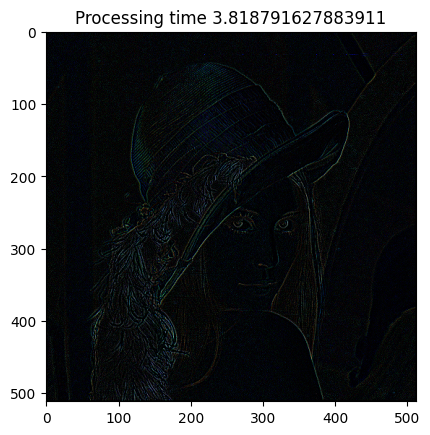

In [ ]:
%matplotlib inline

import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('Lenna.png')

# If the image has an alpha channel, remove it
if image.shape[2] == 4:
    image = image[:, :, :3]

# If the image is in float format (0-1), convert it to uint8 (0-255)
if image.dtype == np.float32 or image.dtype == np.float64:
    image = (image * 255).astype(np.uint8)

# Define the Laplacian kernel
laplacian_kernel = np.array([[0,  1, 0],
                                [1, -4, 1],
                                [0,  1, 0]])

start_time = time.time()
filtered_image = compute(image, laplacian_kernel)
processing_time = time.time() - start_time

plt.imshow(filtered_image)
plt.title(f"Processing time {processing_time}")
plt.show()